<div class="output_png output_subarea output_execute_result">
<center>
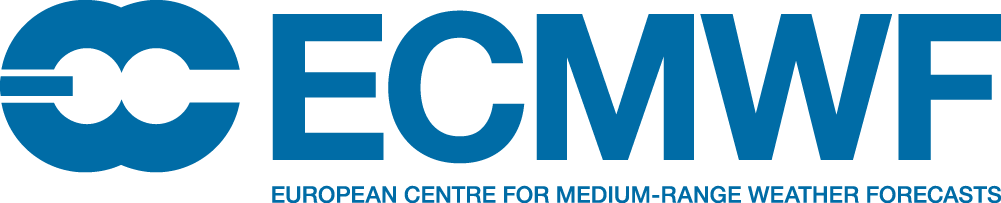
</div>

# 	10m wind and mean sea level pressure

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-wind-10m  


<div class="output_png output_subarea output_execute_result">
<center>
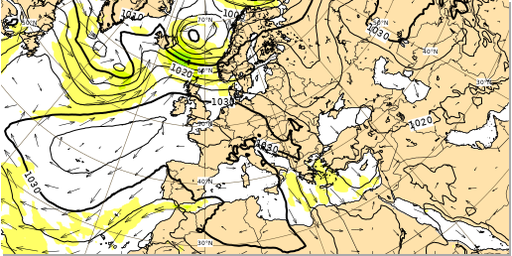</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts).  
This product takes in input 3 parameters :

* [Mean sea level pressure](https://apps.ecmwf.int/codes/grib/param-db/?id=151)
* [10 metre U wind component](https://apps.ecmwf.int/codes/grib/param-db/?id=165)
* [10 metre V wind component](https://apps.ecmwf.int/codes/grib/param-db/?id=166)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-data ecmwf-opendata magpye

In [1]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("ecmwf", beta=True)

In [3]:
parameters = ['msl', '10u', '10v']
filename = 'medium-wind-10m.grib'
filename

'medium-wind-10m.grib'

In [4]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters,
    target=filename
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the files.

In [5]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset. 

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20220428,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20220428,0,12,None,166,od,oper,fc,0001
msl,meanSea,0,20220428,0,12,None,151,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [7]:
data.describe('msl')

shortName,msl
name,Mean sea level pressure
paramId,151
units,Pa
typeOfLevel,meanSea
level,0
date,20220428
time,0
step,12
number,None
class,od


In [8]:
msl = data.select(shortName = 'msl')
msl.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
msl,meanSea,0,20220428,0,12,None,151,od,oper,fc,0001


Mean sea level pressure data has unites Pa, but we want to plot it in hPa, therefore we need to convert it.

In [9]:
msl /= 100

We can calculate wind speed using u and v component:

In [10]:
u = data.select(shortName='10u')
v = data.select(shortName='10v')
speed = ecdata.speed(u,v)
speed.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10si,heightAboveGround,10,20220428,0,12,None,207,od,oper,fc,0001


And finally, we can plot the data on the map. 

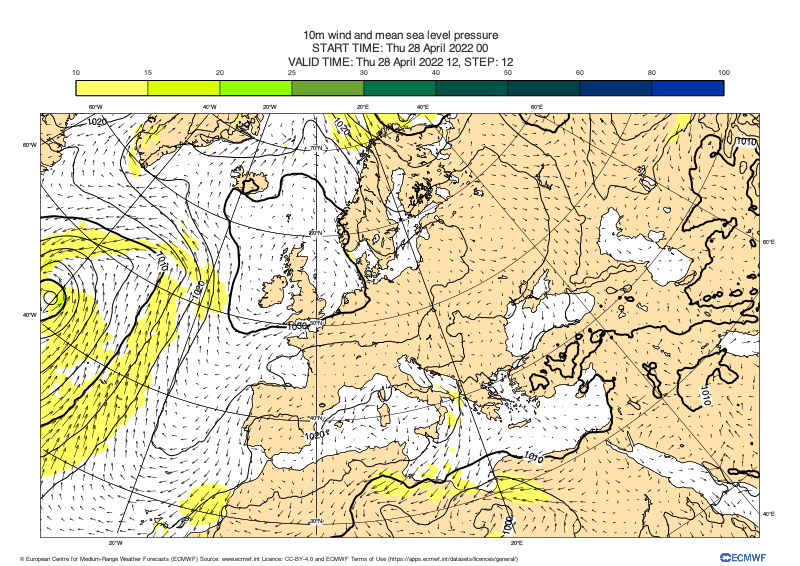

In [11]:
fig = GeoMap(area_name = 'europe')

fig.coastlines(land_colour = "cream",resolution = "medium")

fig.contour_shaded(speed, style = "speed_green_low")
fig.contour_lines(msl, style = "black_i5")
fig.arrows(u=u,v=v, wind_style="arrows", density=2, colour='black')

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["10m wind and mean sea level pressure", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=msl'/>", 
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=msl'/>, STEP: <grib_info key='step' where='shortName=msl'/>"])

fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.